In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer

In [4]:
numx = 30
numy = 60

In [5]:
T = 2
dt = 0.0001
save_interval=10
smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.05)

In [6]:
g_ca_list = np.arange(0.0001, 0.0011, 0.0001)
g_k_list = np.arange(0.0005, 0.0055, 0.0005)

In [7]:
ca_2d_list = []

for i, g_ca in enumerate(g_ca_list):
    
    ca_list = []
    print(str(i + 1) + '/' + str(len(g_ca_list)))
    
    for j, g_k in enumerate(g_k_list):
        
        smc._g_ca = g_ca
        smc._g_k = g_k

        layer = Layer(smc, 
                      numx=numx, 
                      numy=numy, 
                      gip3x=0.1, 
                      gip3y=2.0, 
                      gcx=1000, 
                      gcy=1000,
                      save_interval=save_interval)

        layer.set_stim_pattern(pathway='fast',
                               xmin=14, xmax=16, ymin=29, ymax=31,
                               stim_times=[0])

        sol = layer.run(save_all=True)

        # Extract calcium data
        calcium = sol[:, :numx * numy].reshape(-1, numx, numy)
        ca_list.append(calcium)
        
    ca_2d_list.append(ca_list)

  0%|          | 0/20000 [00:00<?, ?it/s]

1/10


  1%|▏         | 275/20000 [00:00<00:07, 2746.39it/s]

2/10


  1%|▏         | 260/20000 [00:00<00:07, 2590.95it/s]

3/10


  1%|▏         | 261/20000 [00:00<00:07, 2599.97it/s]

4/10


  1%|          | 249/20000 [00:00<00:07, 2485.93it/s]

5/10


  1%|▏         | 277/20000 [00:00<00:07, 2762.84it/s]

6/10


  1%|▏         | 266/20000 [00:00<00:07, 2655.71it/s]

7/10


  1%|▏         | 273/20000 [00:00<00:07, 2726.18it/s]

8/10


  1%|▏         | 272/20000 [00:00<00:07, 2711.77it/s]

9/10


  1%|▏         | 291/20000 [00:00<00:06, 2904.88it/s]

10/10


100%|██████████| 20000/20000 [00:06<00:00, 2973.22it/s]


In [15]:
# Calculate the velocity for each calcium data

speed_2d_list = np.zeros((len(ca_2d_list), len(ca_2d_list[0])))
threshold = 0.055

for i, ca_list in enumerate(ca_2d_list):
    for j, calcium in enumerate(ca_list):
        ca_lon_half = calcium[:, numx//2, numy//2:]
        # Calculate velocity
        wavefronts = []
        for t in np.arange(0, 2, 0.001):
            concentrs = ca_lon_half[int(t / 0.001)]
            for k in range(numy // 2 - 1, -1, -1):
                if concentrs[k] > threshold:
                    break
            wavefronts.append(k) 
        speed = max(wavefronts) / ( np.argmax(wavefronts) * dt * save_interval * 1000 )
        speed_2d_list[i, j] = speed

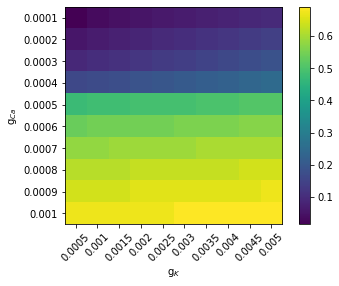

In [16]:
# Plot imshow

plt.figure()
plt.imshow(speed_2d_list)
plt.xticks(range(10), np.round(g_k_list, 4), rotation=45)
plt.yticks(range(10), np.round(g_ca_list, 4))
plt.xlabel('g$_K$')
plt.ylabel('g$_{Ca}$')
plt.colorbar()
plt.show()

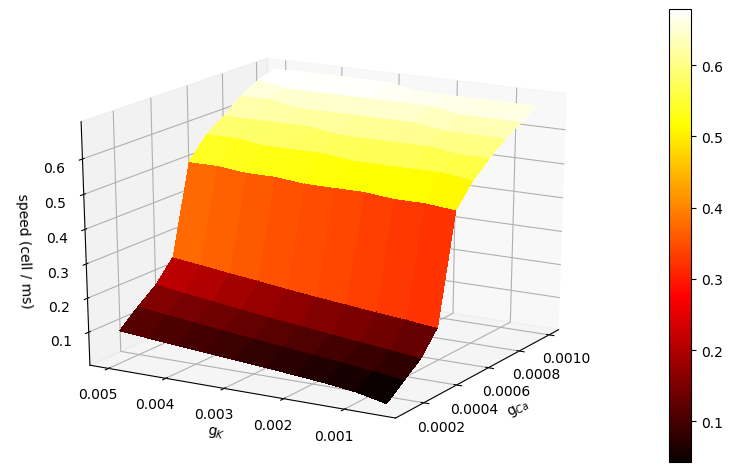

In [58]:
# Plot surface

fig = plt.figure(figsize=(10,6), dpi=100)
ax = plt.axes(projection='3d')
X = np.outer(np.array(g_ca_list), np.ones(len(g_k_list)))
Y = np.outer(np.ones(len(g_ca_list)), g_k_list)
surf = ax.plot_surface(X, Y, speed_2d_list, cmap='hot', antialiased=False)
ax.set_xlabel('g$_{Ca}$')
ax.set_ylabel('g$_K$')
ax.set_zlabel('speed (cell / ms)')
ax.view_init(20, 210)
fig.colorbar(surf)
# plt.savefig('../../results/figures/lon_trace_biophy_slow.pdf', bbox_inches='tight')
plt.show()

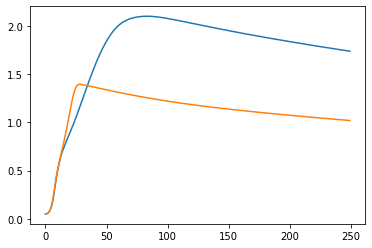

In [35]:
plt.figure()
plt.plot(ca_2d_list[9, 0, :250, numx//2, numy//2])
plt.plot(ca_2d_list[9, 9, :250, numx//2, numy//2])
plt.show()

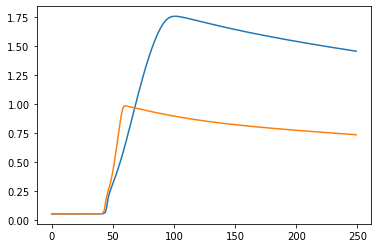

In [33]:
plt.figure()
plt.plot(ca_2d_list[9, 0, :250, numx//2, numy-1])
plt.plot(ca_2d_list[9, 9, :250, numx//2, numy-1])
plt.show()

In [27]:
smc._g_ca = 0.001
smc._g_k = 0.0005
smc.init_fast_cell()
smc._g_bk

0.00011061076182094129

In [28]:
smc._g_ca = 0.001
smc._g_k = 0.005
smc.init_fast_cell()
smc._g_bk

7.263445949819388e-05